In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
X, y = diabetes.data, diabetes.target
X.shape, y.shape

((442, 10), (442,))

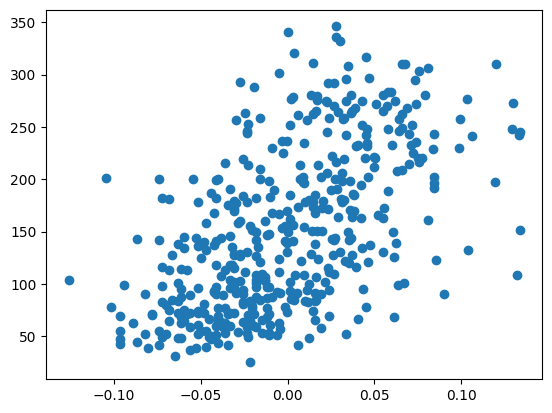

In [6]:
X8 = X[:, 8:9]
plt.scatter(X8, y)
plt.show()

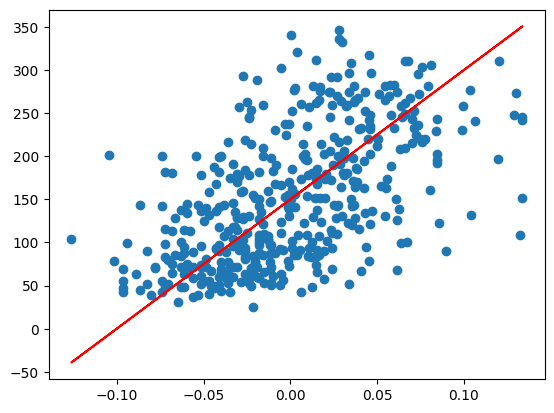

In [7]:
def modelo_linear(X, a, b):
    y = a*X + b
    return y

ypred = modelo_linear(X8, 1500, 150)
plt.scatter(X8, y)
plt.plot(X8, ypred, 'r')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y, ypred):
    mse = mean_squared_error(y, ypred)
    return sqrt(mse)

ypred =  modelo_linear(X8, 1500, 150)
rmse(y, ypred)

69.33114316488918

4030.9987225912855
916.137374550913 152.1334841628957


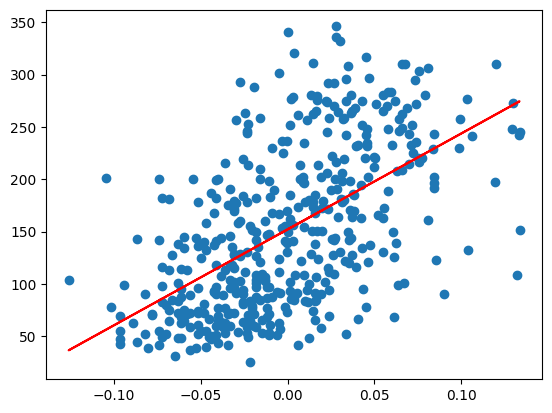

In [9]:
from sklearn.metrics import mean_squared_error
class regressao_linear():
    def __init__(self, learningRate=0.1) -> None:
        self.a = 0
        self.b = 0
        self.learningRate = learningRate
    def fit(self, X, y):
        for _ in range(500):
            # Update B
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)
            ajusteB = erro.mean()
            self.b = self.b - self.learningRate * ajusteB

            # Update A
            ajusteA = (erro * X).sum() / (X * X).sum()
            self.a = self.a - self.learningRate * ajusteA
    def predict(self, X):
        y = self.a*X + self.b
        return y
    
plt.scatter(X8, y)
modelo = regressao_linear()

modelo.fit(X8,y)

ypred = modelo.predict(X8)
print(mean_squared_error(y,ypred))
print(modelo.a, modelo.b)
plt.plot(X8,ypred, 'r')
plt.show()


4030.9987225912855
152.13348416289585 [916.13737455]


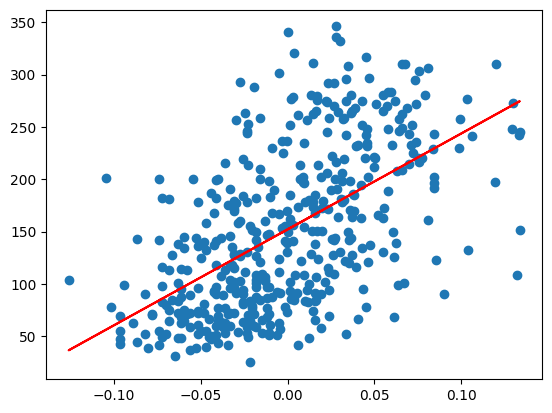

In [10]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

modelo.fit(X8, y)
ypred = modelo.predict(X8)
print(mean_squared_error(y,ypred))
print(modelo.intercept_, modelo.coef_)

plt.scatter(X8, y)
plt.plot(X8,ypred, 'r')
plt.show()

2859.69634758675
152.13348416289597 [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


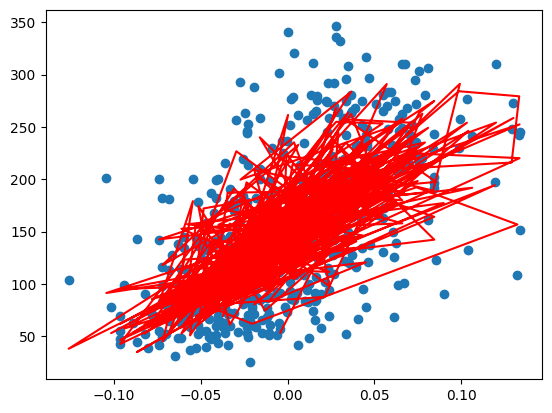

In [11]:
modelo = LinearRegression()

modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y,ypred))
print(modelo.intercept_, modelo.coef_)

plt.plot(X8,ypred, 'r')
plt.scatter(X8, y)
plt.show()